In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.api as sm

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [3]:
funding_liquidity, market_liquidity = liquidity_observables()

tsmom_model.py:409: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  funding_liquidity['TED Spread']=ted.resample(rule='m',how='last')/100.
tsmom_model.py:410: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  funding_liquidity['LIBOR term repo']=libor_term_repo.resample(rule='m',how='last')/100.
tsmom_model.py:414: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  PS=pd.read_csv('PS.csv',index_col=0,parse_dates=True).resample(rule='m',how='last')
tsmom_model.py:415: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  us10y_zero=quandl.get('FED/SVENY',authtoken=token).SVENY10.resample(rule='d',how='last').dropna()
tsmom_model.py:416: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  yield10=quandl.get('USTREASURY/YIELD',authtoken=token)['10 YR'].resample(rule='d',how='last').dropna()
tsmom_

In [8]:
cleansed=load_amihud_markets_price()

tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:162: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [9]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:46: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:48: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:48: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:51: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future ve

# Presentation to be like "Time Varying Liquidity and Momentum Profits (2015) paper

Rank by deciles, HML (8,9,10) - (1,2,3).  Save monthly returns (equal (risk?) weighted) and if you want to annualized then resample.


Then correlation matrix 
* Overall market vol?
* Market illiquidity (median Amihud through time series)


# Amihud (2002) Annual portfolio sorts

In [10]:
data=calc_zscore_expanding_window(amihud.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

tsmom_model.py:275: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=3,window=100000000,center=False).mean()
  return (df-pd.rolling_mean(df,100000000,min_periods=min_per))/pd.rolling_std(df,100000000,min_periods=min_per)
tsmom_model.py:275: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=3,window=100000000,center=False).std()
  return (df-pd.rolling_mean(df,100000000,min_periods=min_per))/pd.rolling_std(df,100000000,min_periods=min_per)


In [11]:
sector_rtns={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_rtns[sect]=np.log(cleansed[d_map[sect]].resample(rule='m',how='last')).diff().dropna(how='all')
sector_rtns['All']=np.log(cleansed.resample(rule='m',how='last')).diff().dropna(how='all')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  after removing the cwd from sys.path.
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """


In [12]:
sector_portfolio_sorts={}
for s in sector_zscores.keys():
    sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,2)
sector_portfolio_sorts['All']=quantile_portfolios_annual(data,cleansed,2)

tsmom_model.py:240: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  mkts=quantile_columns(rank_data.resample(rule='a',how='median'),year,number_of_buckets,i)
tsmom_model.py:241: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  rtns = price_data.resample(rule='m',how='last')[mkts].pct_change()[str(y+1)].mean(axis=1)


In [13]:
factors=pd.DataFrame()
for s in sector_portfolio_sorts.keys():
    factors[s]=sector_portfolio_sorts[s]['1']-sector_portfolio_sorts[s]['0']


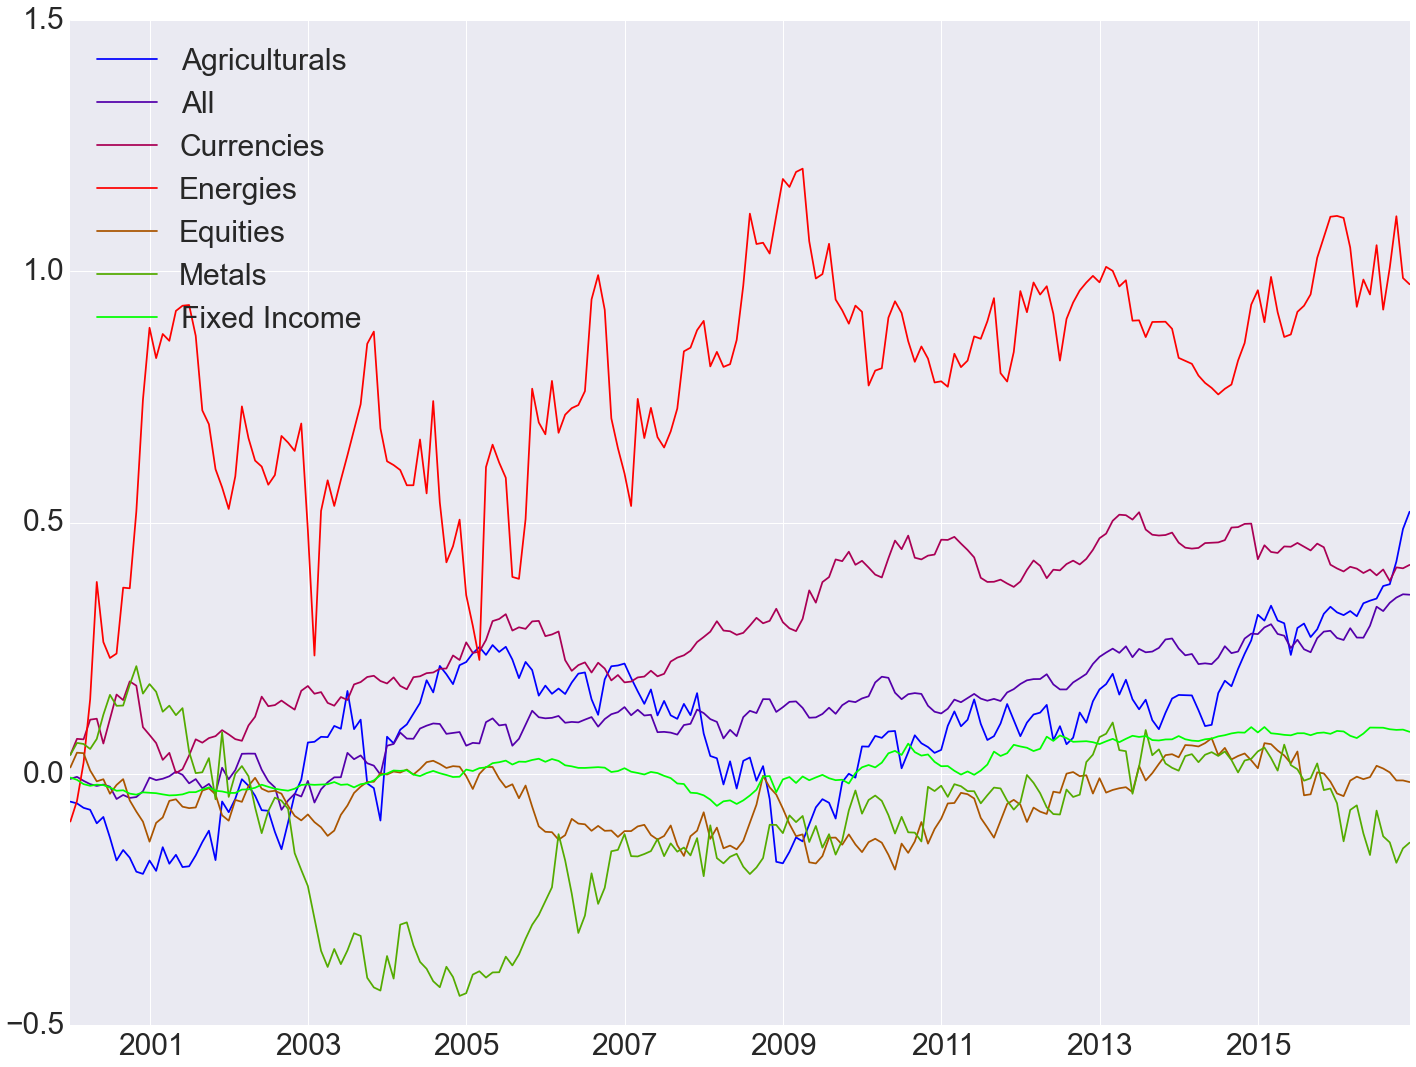

In [14]:
factors.cumsum().plot(colormap='brg')

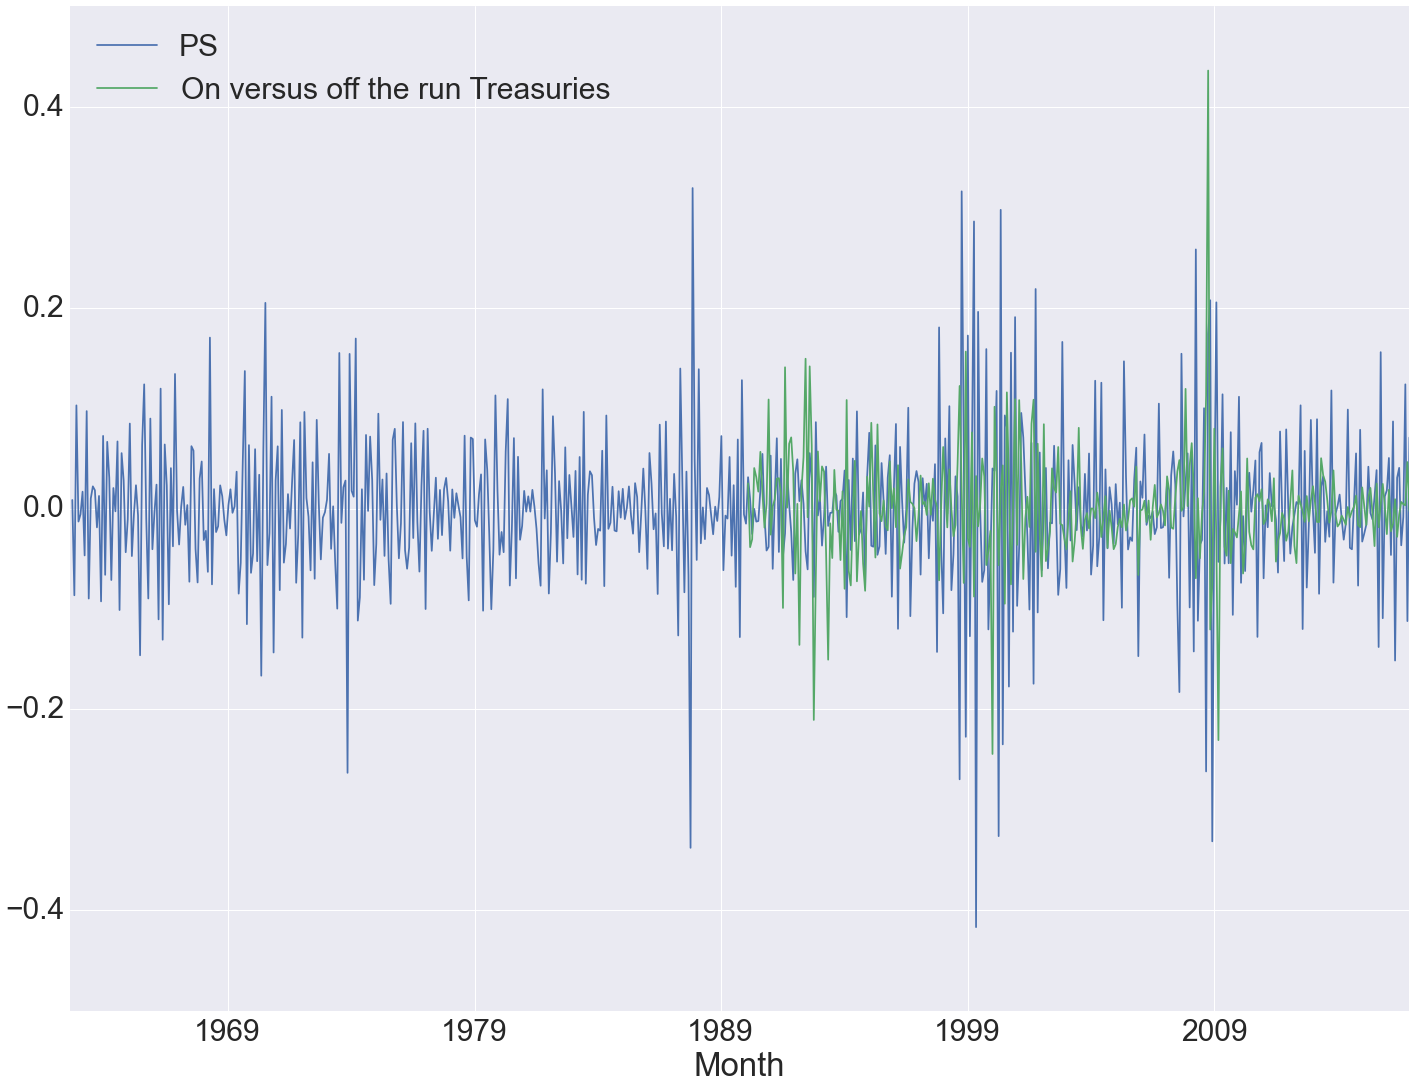

In [33]:
b.diff().plot()

In [68]:
results_df=pd.DataFrame()
for reg_fact in funding_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors.columns:
        ind2=funding_liquidity.diff()[reg_fact].dropna().index
        ind=factors[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors[s].loc[ind],sm.add_constant(funding_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)


/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [69]:
results_df.round(2)

,TED Spread,TED SpreadTstats,LIBOR term repo,LIBOR term repoTstats
0,-0.63,-0.41,0.49,1.50
1,-0.23,-0.63,0.26,2.04
2,-0.12,-0.21,-0.23,-3.48
3,2.03,0.72,0.76,2.14
4,1.07,1.89,0.26,0.82
5,-0.58,-0.71,-0.30,-0.97
6,0.16,0.50,0.11,0.91


In [70]:
#results_df=pd.DataFrame()
for reg_fact in market_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors.columns:
        ind2=market_liquidity.diff()[reg_fact].dropna().index
        ind=factors[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors[s].loc[ind],sm.add_constant(market_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [77]:
print results_df.round(2).T[[u'Agriculturals', u'Energies', u'Equities',u'Fixed Income', u'Metals' , u'All']].to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  Agriculturals &  Energies &  Equities &  Fixed Income &  Metals &   All \\
\midrule
TED Spread                             &          -0.63 &      2.03 &      1.07 &          0.16 &   -0.58 & -0.23 \\
TED SpreadTstats                       &          -0.41 &      0.72 &      1.89 &          0.50 &   -0.71 & -0.63 \\
LIBOR term repo                        &           0.49 &      0.76 &      0.26 &          0.11 &   -0.30 &  0.26 \\
LIBOR term repoTstats                  &           1.50 &      2.14 &      0.82 &          0.91 &   -0.97 &  2.04 \\
PS                                     &           0.03 &      0.02 &     -0.04 &          0.02 &    0.04 &  0.01 \\
PSTstats                               &           0.81 &      0.30 &     -2.16 &          2.08 &    1.23 &  0.54 \\
On versus off the run Treasuries       &           0.05 &      0.09 &      0.11 &          0.02 &   -0.02 &  0.02 \\
On versus off the run TreasuriesTstats &           1.17 &

# FHT Annual portfolio sorts

In [39]:
FHT=calculate_FHT(cleansed)
data=calc_zscore_expanding_window(FHT.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(FHT)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

tsmom_model.py:285: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  nonzero=x[x==0].resample(rule='m',how='count')
tsmom_model.py:286: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  Z=(nonzero/x.resample(rule='m',how='count')).dropna()
tsmom_model.py:287: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')
tsmom_model.py:287: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')


In [40]:
sector_portfolio_sorts={}
for s in sector_zscores.keys():
    sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,2)
sector_portfolio_sorts['All']=quantile_portfolios_annual(FHT,cleansed,2)

In [41]:
factors_FHT=pd.DataFrame()
for s in sector_portfolio_sorts.keys():
    factors_FHT[s]=sector_portfolio_sorts[s]['1']-sector_portfolio_sorts[s]['0']


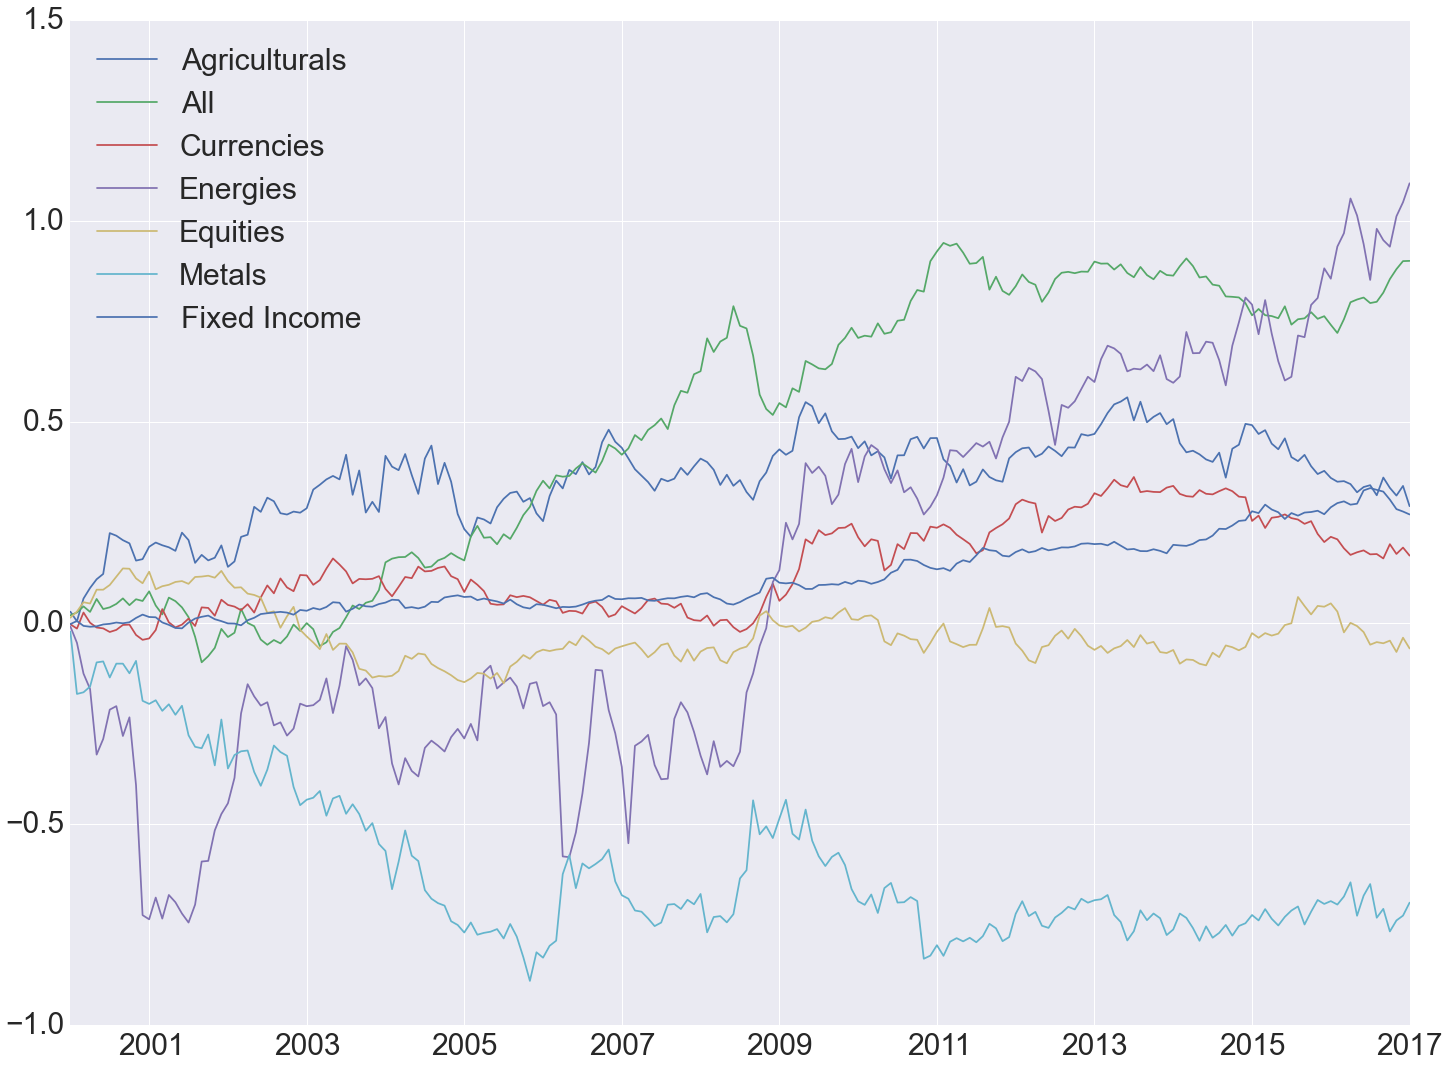

In [42]:
factors_FHT['2000':].cumsum().plot()

In [83]:
results_df=pd.DataFrame()
for reg_fact in funding_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors_FHT.columns:
        ind2=funding_liquidity.diff()[reg_fact].dropna().index
        ind=factors_FHT[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors_FHT[s].loc[ind],sm.add_constant(funding_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
#results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [84]:
results_df.round(2)

,TED Spread,TED SpreadTstats,LIBOR term repo,LIBOR term repoTstats
0,-1.90,-2.96,0.69,4.12
1,-0.94,-1.03,-0.47,-0.81
2,-0.59,-0.89,0.09,0.69
3,-2.56,-1.30,0.13,0.34
4,-0.04,-0.06,0.20,0.77
5,3.46,1.91,-1.39,-2.30
6,-0.00,-0.00,0.06,0.89


In [85]:
#results_df=pd.DataFrame()
for reg_fact in market_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors_FHT.columns:
        ind2=market_liquidity.diff()[reg_fact].dropna().index
        ind=factors_FHT[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors_FHT[s].loc[ind],sm.add_constant(market_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [87]:
print results_df.round(2).T[[u'Agriculturals','Currencies', u'Energies', u'Equities',u'Fixed Income', u'Metals' , u'All']].to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Agriculturals &  Currencies &  Energies &  Equities &  Fixed Income &  Metals &   All \\
\midrule
TED Spread                             &          -1.90 &       -0.59 &     -2.56 &     -0.04 &         -0.00 &    3.46 & -0.94 \\
TED SpreadTstats                       &          -2.96 &       -0.89 &     -1.30 &     -0.06 &         -0.00 &    1.91 & -1.03 \\
LIBOR term repo                        &           0.69 &        0.09 &      0.13 &      0.20 &          0.06 &   -1.39 & -0.47 \\
LIBOR term repoTstats                  &           4.12 &        0.69 &      0.34 &      0.77 &          0.89 &   -2.30 & -0.81 \\
PS                                     &           0.02 &        0.02 &     -0.11 &     -0.00 &         -0.00 &   -0.05 &  0.03 \\
PSTstats                               &           1.10 &        1.25 &     -2.09 &     -0.16 &         -0.39 &   -1.32 &  1.99 \\
On versus off the run Treasuries       &          -0.01 &        0.04 &    

# Monthly portoflio sorts

In [51]:
amihud_monthly = read_monthly(amihud=True)

In [52]:
factors_monthly=pd.DataFrame()
for s in amihud_monthly.keys():
    factors_monthly[s]=amihud_monthly[s]['1']-amihud_monthly[s]['0']


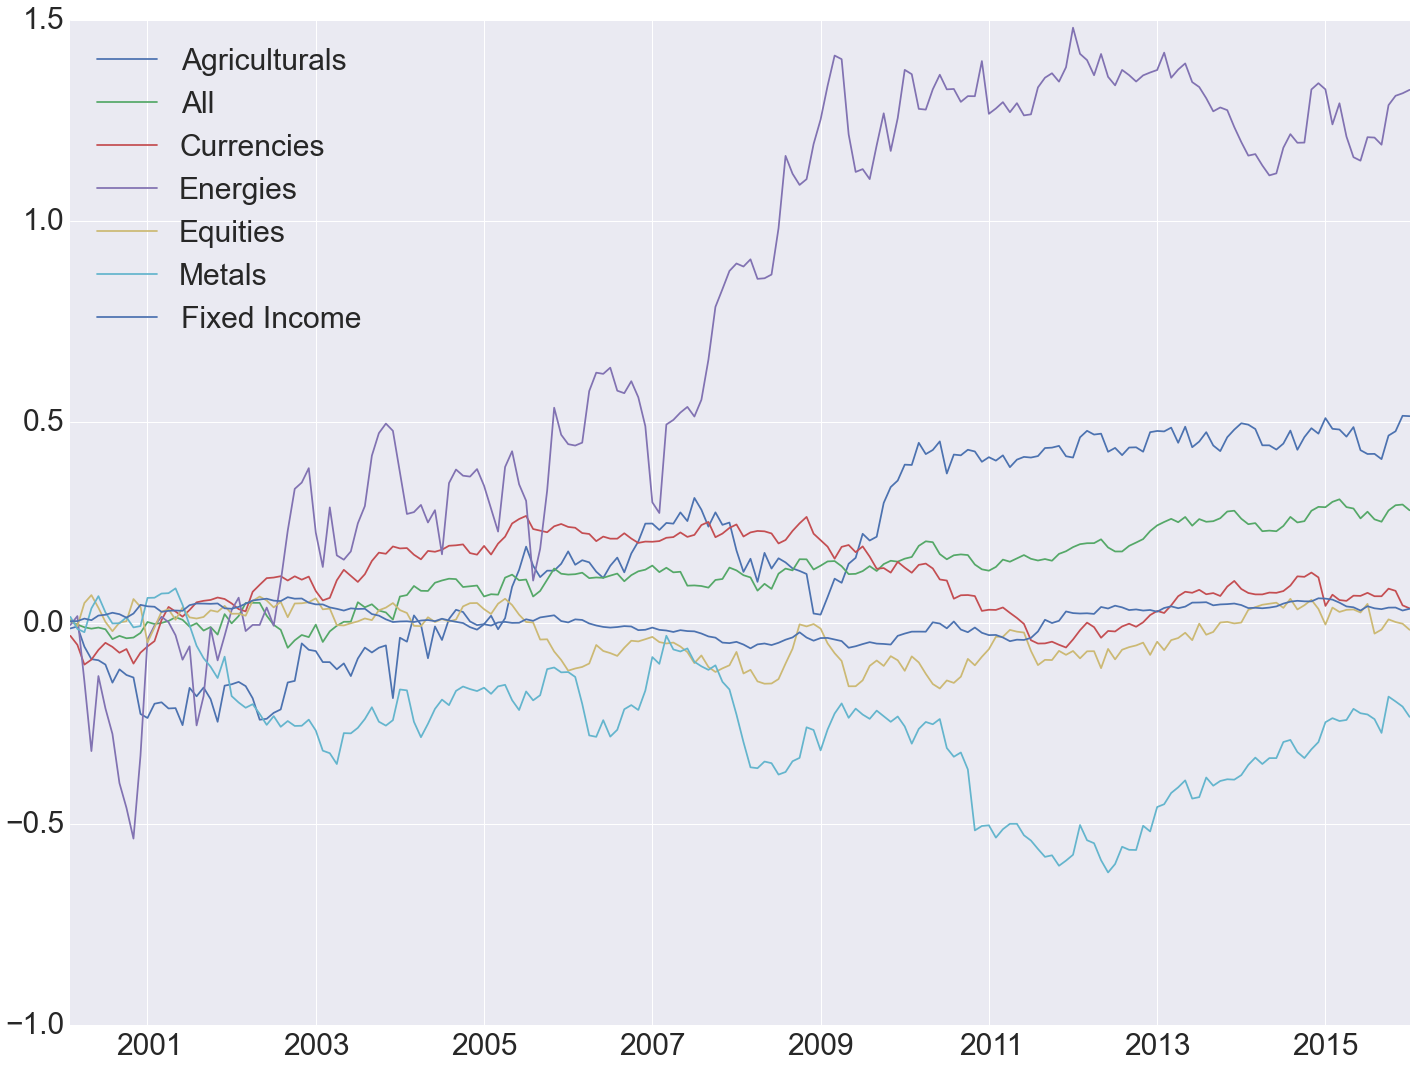

In [53]:
factors_monthly.cumsum().plot()

In [78]:
results_df=pd.DataFrame()
for reg_fact in funding_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors_monthly.columns:
        ind2=funding_liquidity.diff()[reg_fact].dropna().index
        ind=factors_monthly[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors_monthly[s].loc[ind],sm.add_constant(funding_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
#results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [79]:
results_df.round(2)

,TED Spread,TED SpreadTstats,LIBOR term repo,LIBOR term repoTstats
0,-1.06,-0.91,0.09,0.38
1,-0.34,-0.95,0.25,1.96
2,0.84,1.76,-0.18,-0.99
3,-2.06,-1.05,0.28,0.71
4,1.26,2.36,0.23,0.70
5,0.04,0.05,-0.33,-1.60
6,-0.01,-0.04,0.09,1.34


In [80]:
#results_df=pd.DataFrame()
for reg_fact in market_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors_monthly.columns:
        ind2=market_liquidity.diff()[reg_fact].dropna().index
        ind=factors_monthly[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors_monthly[s].loc[ind],sm.add_constant(market_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [82]:
print results_df.round(2).T[[u'Agriculturals', u'Energies', u'Equities',u'Fixed Income', u'Metals' , u'All']].to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  Agriculturals &  Energies &  Equities &  Fixed Income &  Metals &   All \\
\midrule
TED Spread                             &          -1.06 &     -2.06 &      1.26 &         -0.01 &    0.04 & -0.34 \\
TED SpreadTstats                       &          -0.91 &     -1.05 &      2.36 &         -0.04 &    0.05 & -0.95 \\
LIBOR term repo                        &           0.09 &      0.28 &      0.23 &          0.09 &   -0.33 &  0.25 \\
LIBOR term repoTstats                  &           0.38 &      0.71 &      0.70 &          1.34 &   -1.60 &  1.96 \\
PS                                     &           0.02 &      0.01 &     -0.04 &          0.00 &    0.02 &  0.01 \\
PSTstats                               &           0.42 &      0.11 &     -1.99 &          0.27 &    0.70 &  0.58 \\
On versus off the run Treasuries       &          -0.03 &      0.01 &      0.08 &          0.02 &   -0.07 &  0.01 \\
On versus off the run TreasuriesTstats &          -0.65 &

# Monthly FHT

In [58]:
FHT_monthly = read_monthly(amihud=False)

In [59]:
factors_monthly_FHT=pd.DataFrame()
for s in FHT_monthly.keys():
    factors_monthly_FHT[s]=FHT_monthly[s]['1']-FHT_monthly[s]['0']


In [90]:
results_df=pd.DataFrame()
for reg_fact in funding_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors_monthly_FHT.columns:
        ind2=funding_liquidity.diff()[reg_fact].dropna().index
        ind=factors_monthly_FHT[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors_monthly_FHT[s].loc[ind],sm.add_constant(funding_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
#results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [91]:
results_df.round(2)

,TED Spread,TED SpreadTstats,LIBOR term repo,LIBOR term repoTstats
0,-0.08,-0.08,-0.07,-0.24
1,-0.53,-0.74,0.38,1.69
2,0.27,0.25,-0.40,-2.10
3,2.14,1.62,-0.68,-0.97
4,0.06,0.06,-0.30,-0.60
5,-1.31,-1.11,0.76,2.77
6,-0.12,-0.76,0.09,2.70


In [92]:
#results_df=pd.DataFrame()
for reg_fact in market_liquidity.columns:
    results_param=[]
    results_t=[]
    for s in factors_monthly_FHT.columns:
        ind2=market_liquidity.diff()[reg_fact].dropna().index
        ind=factors_monthly_FHT[s].loc[ind2].dropna().index
        # Please make the fit robust 
        res=sm.OLS(factors_monthly_FHT[s].loc[ind],sm.add_constant(market_liquidity.diff()[reg_fact]).loc[ind]).fit(cov_type='HAC',cov_kwds={'maxlags':1})
        results_param.append(res.params[reg_fact])
        results_t.append(res.tvalues[reg_fact])
    results_df[reg_fact]=pd.Series(results_param)
    results_df[reg_fact+'Tstats']=pd.Series(results_t)
results_df.set_axis(factors.columns)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [94]:
print results_df.round(2).T[[u'Agriculturals','Currencies', u'Energies', u'Equities',u'Fixed Income', u'Metals' , u'All']].to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Agriculturals &  Currencies &  Energies &  Equities &  Fixed Income &  Metals &   All \\
\midrule
TED Spread                             &          -0.08 &        0.27 &      2.14 &      0.06 &         -0.12 &   -1.31 & -0.53 \\
TED SpreadTstats                       &          -0.08 &        0.25 &      1.62 &      0.06 &         -0.76 &   -1.11 & -0.74 \\
LIBOR term repo                        &          -0.07 &       -0.40 &     -0.68 &     -0.30 &          0.09 &    0.76 &  0.38 \\
LIBOR term repoTstats                  &          -0.24 &       -2.10 &     -0.97 &     -0.60 &          2.70 &    2.77 &  1.69 \\
PS                                     &           0.01 &        0.02 &      0.01 &     -0.03 &         -0.00 &    0.05 &  0.02 \\
PSTstats                               &           0.53 &        1.29 &      0.14 &     -1.50 &         -0.79 &    1.88 &  1.23 \\
On versus off the run Treasuries       &          -0.07 &        0.08 &    